In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from collections import Counter
import seaborn as sns

In [6]:
# downloading NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\michp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\michp\AppData\Roaming\nltk_data...


[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
file_path = 'mental_health.csv'

In [8]:
reddit_depression_path = "./reddit_depression"
reddit_non_depression_path = "./reddit_non_depression"
blog_depression_path = "./blogs_depression"
blog_non_depression_path = "./blogs_non_depression"
mixed_depression_path = "./mixed_depression"
mixed_non_depression_path = "./mixed_non_depression"


## read and merge text files from folders

In [9]:

def read_files_from_directory(directory_path, label):
    texts = []
    for filename in os.listdir(directory_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r', encoding='latin-1') as file:
                texts.append((file.read(), label))
    return texts

In [10]:
reddit_depression_texts = read_files_from_directory(reddit_depression_path, 1)
reddit_non_depression_texts = read_files_from_directory(reddit_non_depression_path, 0)
blog_depression_texts = read_files_from_directory(blog_depression_path, 1)
blog_non_depression_texts = read_files_from_directory(blog_non_depression_path, 0)
mixed_depression_texts = read_files_from_directory(mixed_depression_path, 1)
mixed_non_depression_texts = read_files_from_directory(mixed_non_depression_path, 0)

all_texts = reddit_depression_texts + reddit_non_depression_texts + blog_depression_texts + blog_non_depression_texts + mixed_depression_texts + mixed_non_depression_texts
texts, labels = zip(*all_texts)

In [ ]:
all_words = ' '.join(texts).split()
word_freq = Counter(all_words)

# Convert to dataframe for easy plotting
freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=freq_df.head(20))
plt.title('Top 20 Most Frequent Words')
plt.show()

In [11]:

csv_data = pd.read_csv(file_path)
csv_texts = csv_data['text'] 
csv_labels = csv_data['label']  

texts += tuple(csv_texts)
labels += tuple(csv_labels)

In [12]:
def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove special characters and numbers
    tokens = word_tokenize(text)  # tokenize
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize the words
    return ' '.join(lemmatized_text)

In [13]:
# preprocessing
processed_texts = [preprocess_text(text) for text in texts]

df = pd.DataFrame({
    'processed_text': processed_texts,
    'label': labels
})

In [14]:
# tf-idf feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']

In [15]:
# splits the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)


In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluating the best model on the test set
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

C:\Users\michp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\michp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      5108
           1       0.93      0.90      0.91      5083

    accuracy                           0.91     10191
   macro avg       0.92      0.91      0.91     10191
weighted avg       0.91      0.91      0.91     10191



C:\Users\michp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


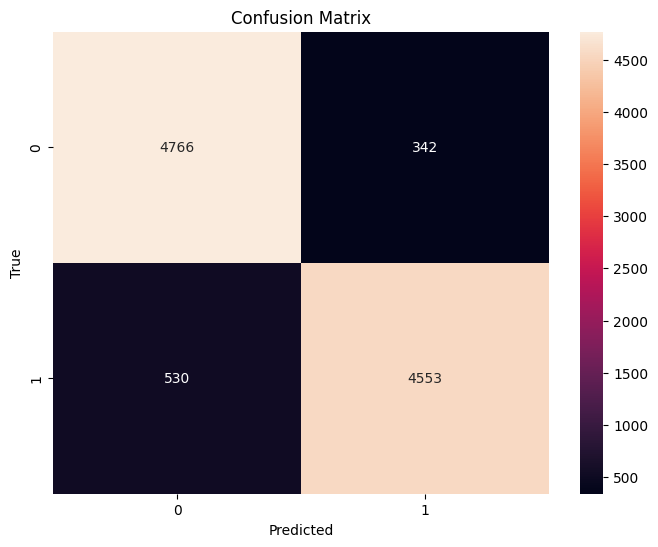

In [23]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

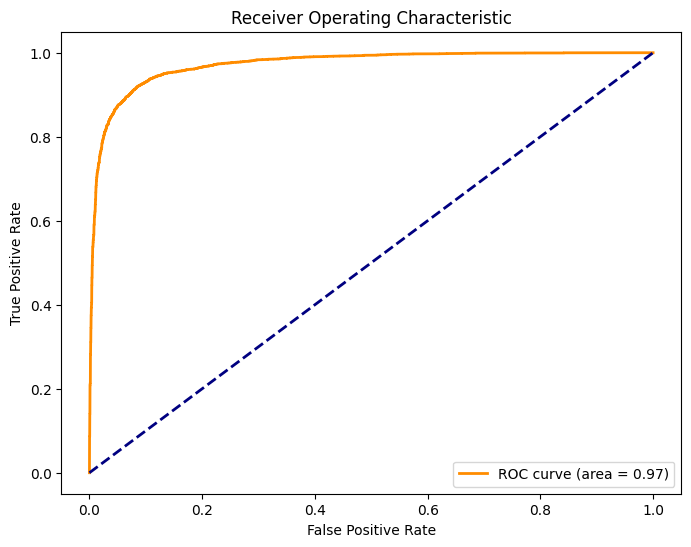

In [25]:
# Calculate probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
# evaluates the model
print("model accuracy:", accuracy_score(y_test, y_pred))
print("\nclassification report:\n", classification_report(y_test, y_pred))
print("confusion matrix", confusion_matrix(y_test, y_pred))

model accuracy: 0.9066823667942302

classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5108
           1       0.92      0.89      0.90      5083

    accuracy                           0.91     10191
   macro avg       0.91      0.91      0.91     10191
weighted avg       0.91      0.91      0.91     10191

confusion matrix [[4736  372]
 [ 579 4504]]


In [19]:
# new text
new_text = ["I'm feeling really stressed about work.", "Today is a great day, I feel so happy!", "Life is good.", "I wanna kill myself, I'm so stressed.", "I feel like I have nothing left to live for.", "Would anyone even care if I disappeared?", "I'm really going to do it this time."]

# preprocess the new tweets
processed_new_text = [preprocess_text(tweet) for tweet in new_text]

# transform the new tweets using the same TF-IDF vectorizer
X_new = vectorizer.transform(processed_new_text)

# predict using the trained model
new_predictions = model.predict(X_new)

# prints the predictions
for tweet, pred in zip(new_text, new_predictions):
    print(f"Text: {tweet}\nPredicted Category: {pred}\n")


Text: I'm feeling really stressed about work.
Predicted Category: 0

Text: Today is a great day, I feel so happy!
Predicted Category: 0

Text: Life is good.
Predicted Category: 0

Text: I wanna kill myself, I'm so stressed.
Predicted Category: 1

Text: I feel like I have nothing left to live for.
Predicted Category: 1

Text: Would anyone even care if I disappeared?
Predicted Category: 1

Text: I'm really going to do it this time.
Predicted Category: 1



### takes user input when run and evaluates text based on the trained model

In [20]:
# function to map numerical labels to descriptive categories
def label_to_category(label):
    if label == 0:
        return 'No need for mental health intervention'
    elif label == 1:
        return 'Possible need for mental health intervention'
    else:
        return 'Unknown'

# function to get a prediction for a single tweet or text
def predict_text(model, vectorizer, text):
    processed_text = preprocess_text(text)  # preprocess
    transformed_text = vectorizer.transform([processed_text])  # transform
    prediction = model.predict(transformed_text)  # predict
    return label_to_category(prediction[0])  # convert to category

# user input
user_input = input("Enter a tweet or text: ")
predicted_category = predict_text(model, vectorizer, user_input)
print(f"Predicted Category: {predicted_category}")


Predicted Category: Possible need for mental health intervention
